# Project: Investigate a Dataset - [No-Show-Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>1. PatientId : Identification of a patient
2. AppointmentID : Identification of each appointment
3. Gender : Male or Female ➡ Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. AppointmentDay : The day of the actuall appointment, when they have to visit the doctor.
5. ScheduledDay : The day someone called or registered the appointment, this is before appointment of course.
6.  Age : How old is the patient.
7.  Neighbourhood : Where the appointment takes place.
8. Scholarship : True of False ➡ indicates whether or not the patient is enrolled in Brasilian welfare program
9.  Hipertension : True or False
10. Diabetes : True or False
11.  Alcoholism : True or False
12. Handcap : True or False
13. SMS_received : True or False
14. No-show : True or False. ➡   it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### Question(s) for Analysis

>Q1 : Does People Show-Up or No-Show to Appointments ?    
Q2 : Does Receiving SMS affect on  Showing up to Appointments ?     
Q3 : Does Males Showed up to Appointments more than Females ?    
Q4 : What are the Most Neighborhoods where Patients are Shown up to Appointments ?      
 Q5: What are the Most Neighborhoods where Patients are Not Shown up to Appointments ?
 Q6. Does Neighbourhood affect Showing up for Appointments?

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling 👀

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.nunique().sum()

276606

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
for col in df.columns :
    print('{}:'.format(col))
    print (df[col].unique())
    print(100*"-")

PatientId:
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
----------------------------------------------------------------------------------------------------
AppointmentID:
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
----------------------------------------------------------------------------------------------------
Gender:
['F' 'M']
----------------------------------------------------------------------------------------------------
ScheduledDay:
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
----------------------------------------------------------------------------------------------------
AppointmentDay:
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



##  Data Cleaning🧹
>1.Drop PatientId ,AppointmentID  
2. Change ScheduledDay , AppointmentDay data type to datetime   
3. split date and time from ScheduledDay , AppointmentDay    
4. Remove columns with age value less than zero    
5. Remove waiting time lessthan zero     
6. Remove columns with Handicap value more than 1   
7. Rename Hipertension➡ Hypertension , Handcap ➡ Handicap , No-show ➡ No_show  
8. Handling 0,1 values to Yes and No




In [11]:
df.drop(['PatientId' ,'AppointmentID'] , axis=1 , inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
date = df['ScheduledDay'].dt.date
df.insert(loc=1, column='Scheduled_date', value = date)

In [14]:
date = df['AppointmentDay'].dt.date
df.insert(loc=4, column='Appointment_date', value = date)

In [15]:
df['Appointment_day'] = df['AppointmentDay'].dt.day
df['Scheduled_day'] = df['ScheduledDay'].dt.day

In [16]:
df.drop(['ScheduledDay','AppointmentDay'] , axis=1 , inplace=True)

In [17]:
df.head()

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_day,Scheduled_day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,29
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,29
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,29
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,29
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,29


In [18]:
df.rename(columns={ 'Hipertension':'Hypertension',
            'No-show':'No_show',
            'Handcap':'Handicap'},inplace = True)
df.head()

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Appointment_day,Scheduled_day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,29
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,29
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,29
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,29
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,29


In [19]:
df['waiting_time'] = df['Appointment_day'] - df['Scheduled_day']
df.drop(df.loc[df['waiting_time'] < 0].index, inplace=True)


In [20]:
df.drop(df.loc[df['Age'] < 0].index, inplace=True)

df.drop(df.loc[df['Handicap'] > 1].index, inplace=True)

In [21]:
df.drop(['Appointment_day','Scheduled_day','waiting_time'] , axis=1 , inplace=True)
df.head()

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80282 entries, 0 to 110523
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            80282 non-null  object
 1   Scheduled_date    80282 non-null  object
 2   Appointment_date  80282 non-null  object
 3   Age               80282 non-null  int64 
 4   Neighbourhood     80282 non-null  object
 5   Scholarship       80282 non-null  int64 
 6   Hypertension      80282 non-null  int64 
 7   Diabetes          80282 non-null  int64 
 8   Alcoholism        80282 non-null  int64 
 9   Handicap          80282 non-null  int64 
 10  SMS_received      80282 non-null  int64 
 11  No_show           80282 non-null  object
dtypes: int64(7), object(5)
memory usage: 8.0+ MB


In [23]:
dic = { 0 : 'No', 1 : 'Yes' }
df['Scholarship'] = df['Scholarship'].map(dic)
df['Hypertension'] = df['Hypertension'].map(dic)
df['Diabetes'] = df['Diabetes'].map(dic)
df['Alcoholism'] = df['Alcoholism'].map(dic)
df['Handicap'] = df['Handicap'].map(dic)
df['SMS_received'] = df['SMS_received'].map(dic)
df.head()

,Gender,Scheduled_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


<a id='eda'></a>
## Exploratory Data Analysis


### Q1 : Does People Show-Up or No-Show to Appointments ?

In [24]:
df['No_show'].value_counts()

No     67244
Yes    13038
Name: No_show, dtype: int64

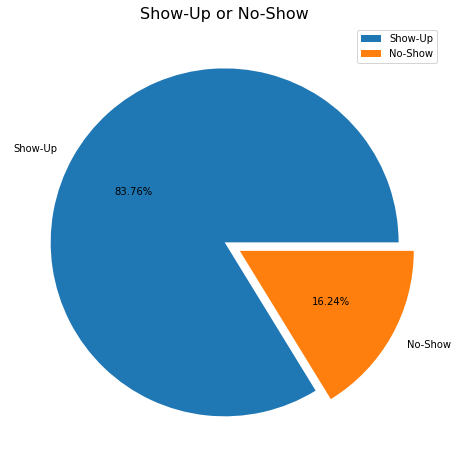

In [25]:
fig = plt.figure(figsize=(15,8))
plt.pie(df['No_show'].value_counts(),labels=['Show-Up' ,'No-Show'], autopct='%.2f%%', explode = [0,0.1])
plt.title('Show-Up or No-Show',size = 16)
plt.legend()
plt.show()

### Q2 : Does Receiving SMS affect on  Showing up  to Appointments ?

In [26]:
showed = df.query('No_show == "No"')
un_showed = df.query('No_show == "Yes"')

In [27]:
showed['SMS_received'].value_counts()

No     55440
Yes    11804
Name: SMS_received, dtype: int64

In [28]:
un_showed['SMS_received'].value_counts()

No     8879
Yes    4159
Name: SMS_received, dtype: int64

In [29]:
def draw (labels ,showed , un_showed , title):
    X_axis = np.arange(len(labels))
    plt.subplots(figsize=(10, 8))
    plt.bar(X_axis - 0.2 , showed , 0.4 , label="Showed Up")
    plt.bar(X_axis + 0.21 ,un_showed, 0.4 ,label="Not Showed Up" , facecolor = '#c44e52')
    plt.title('Show-Up or No-Show VS {} '.format(title),size = 16)
    plt.xticks(X_axis, labels)
    plt.legend()
    plt.show()

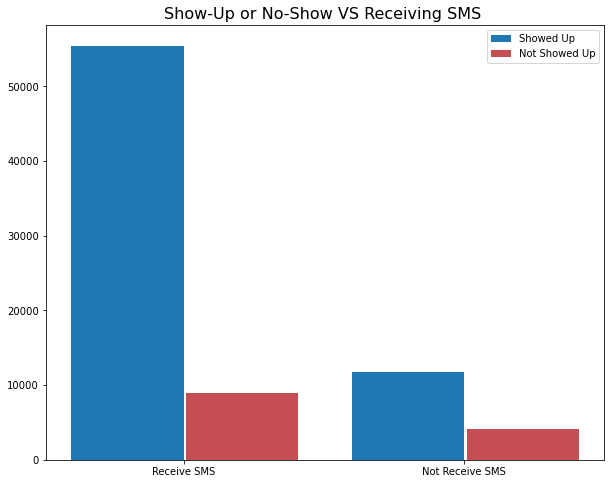

In [30]:
labels=['Receive SMS' ,'Not Receive SMS']
draw(labels,showed['SMS_received'].value_counts(),un_showed['SMS_received'].value_counts(), 'Receiving SMS')



### Q3 : Who Gender showed- up more than the other ?

In [31]:
showed['Gender'].value_counts()

F    43265
M    23979
Name: Gender, dtype: int64

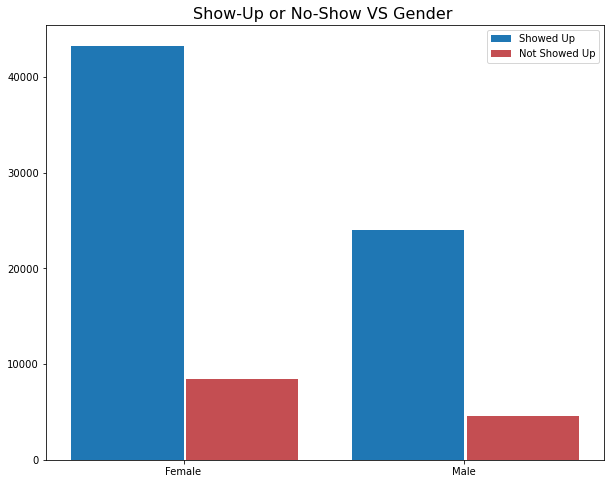

In [32]:
labels=['Female' ,'Male']
draw(labels,showed['Gender'].value_counts(),un_showed['Gender'].value_counts(), 'Gender')

### Q4 : What are the Most Neighborhoods where Patients are Shown up to Appointments ?

In [33]:
showed['Neighbourhood'].value_counts()

JARDIM CAMBURI       5145
MARIA ORTIZ          3696
RESISTÊNCIA          2746
JARDIM DA PENHA      2127
SANTA MARTHA         2125
                     ... 
PONTAL DE CAMBURI      40
ILHA DO BOI            30
AEROPORTO               6
ILHA DO FRADE           5
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

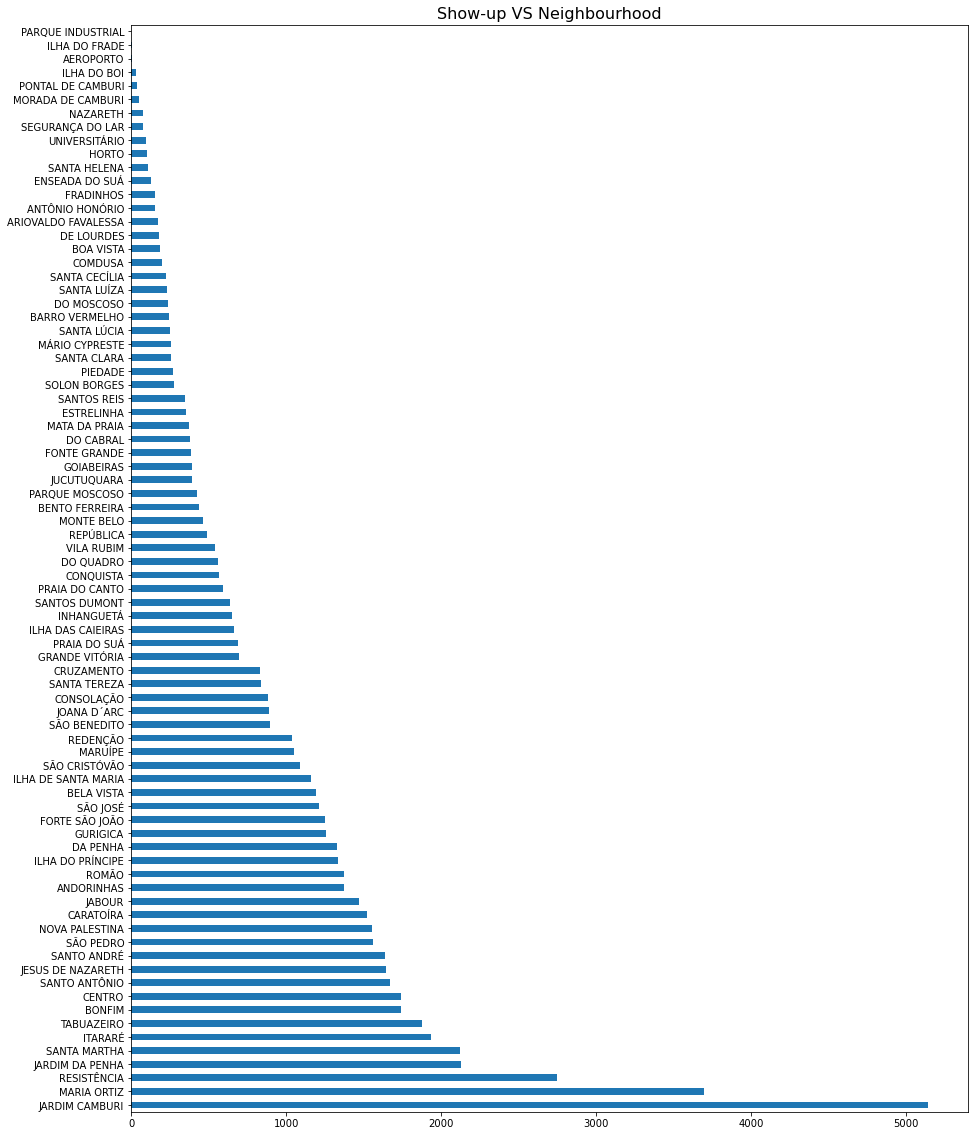

In [34]:
labels = df.Neighbourhood.unique()
plt.subplots(figsize=(15,20))
showed['Neighbourhood'].value_counts().plot(kind='barh')
plt.title('Show-up VS Neighbourhood',size = 16)
plt.show()



### Q5: What are the Most Neighborhoods where Patients are Not Shown up to Appointments ?

In [35]:
un_showed['Neighbourhood'].value_counts()

JARDIM CAMBURI       992
MARIA ORTIZ          796
RESISTÊNCIA          490
ITARARÉ              430
SÃO PEDRO            373
                    ... 
NAZARETH              12
MORADA DE CAMBURI     10
ILHA DO BOI            3
PONTAL DE CAMBURI      3
ILHA DO FRADE          1
Name: Neighbourhood, Length: 78, dtype: int64

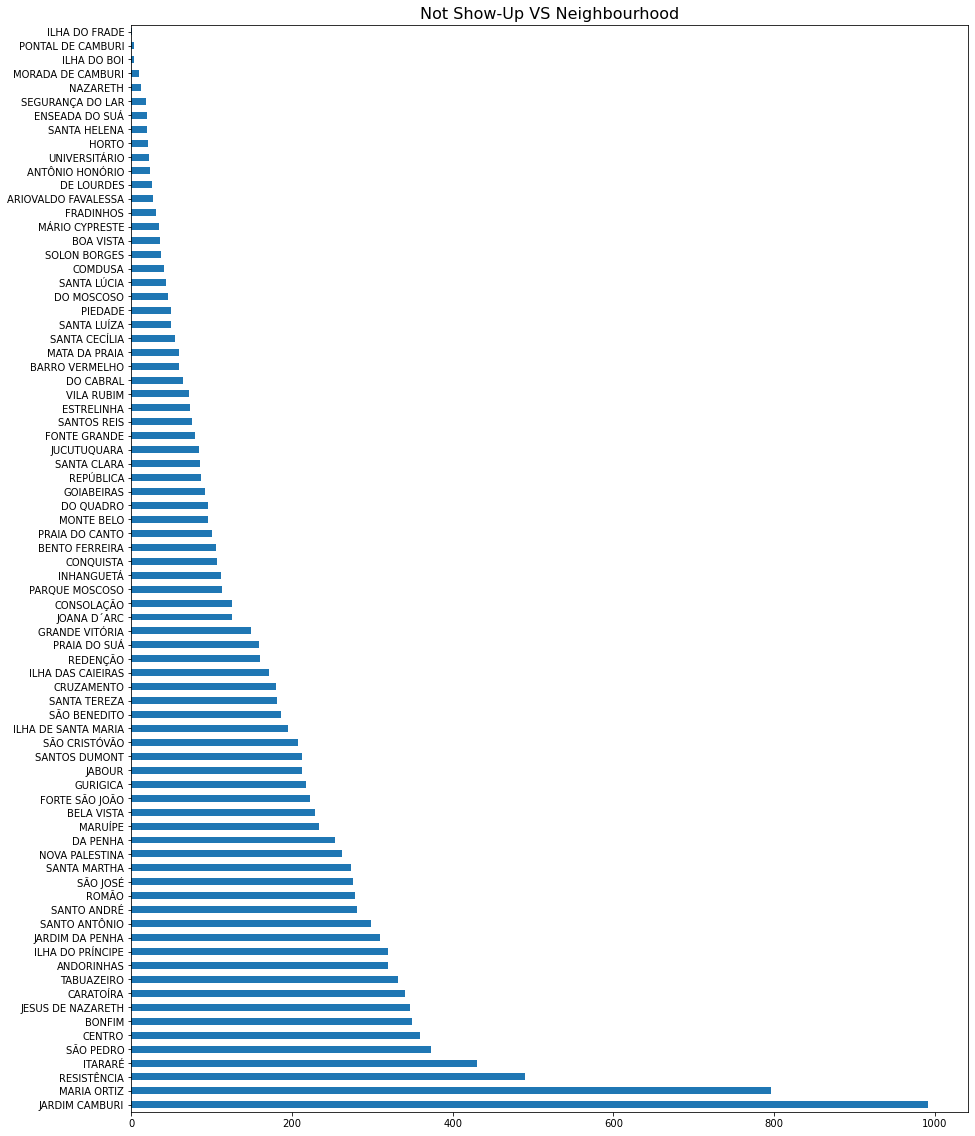

In [36]:
plt.subplots(figsize=(15,20))
un_showed['Neighbourhood'].value_counts().plot(kind='barh')
plt.title('Not Show-Up VS Neighbourhood',size = 16)
plt.show()



### Q6. Does Neighbourhood affect Showing up for Appointments?

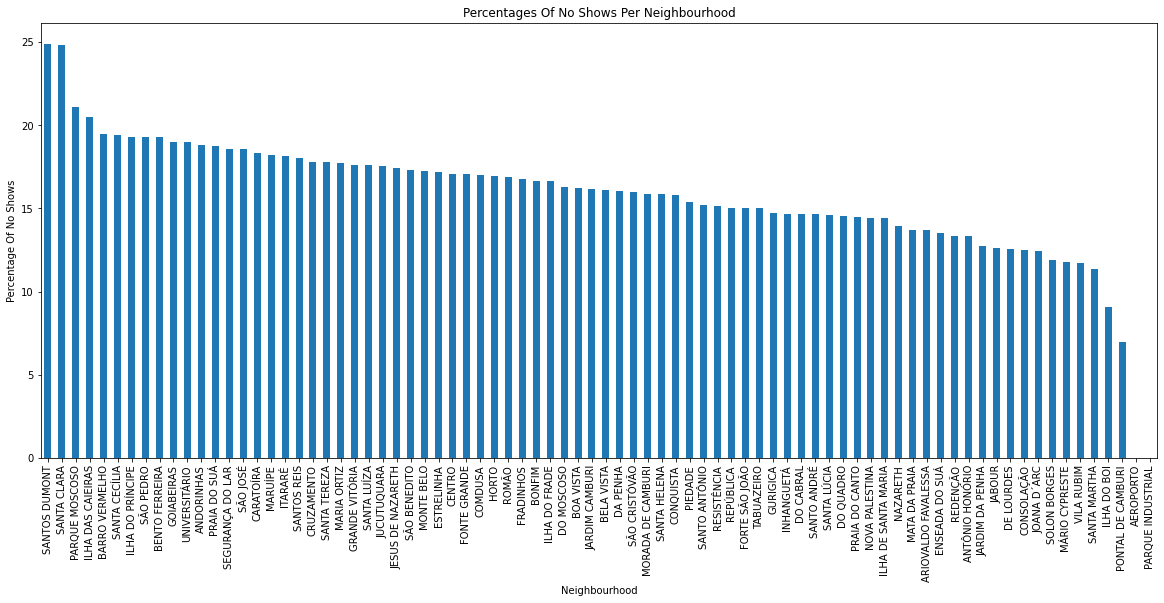

In [37]:
# Investigating neighbourhoods exlusively in regards to show or no shows
noshow = df['No_show'] == "Yes"
df_noshow = df[noshow]
hoods_no_show = df_noshow.groupby(['Neighbourhood']).count()['No_show']
hoods = df.groupby(['Neighbourhood']).count()['No_show']
percentages_no_show = hoods_no_show/hoods*100
percentages_no_show.sort_values()

# Plotting percentages of no_shows per neighbourhood
percentages_no_show.sort_values(ascending=False).plot(kind='bar', title='Percentages of No shows per Neighbourhood'.title(), figsize=(20,8));
plt.ylabel('Percentage of no_shows'.title().replace("_"," "))
plt.xlabel('Neighbourhood'.title());

Text(0.5, 1.0, 'Appointment Show/No Show by Neighbourhoods')

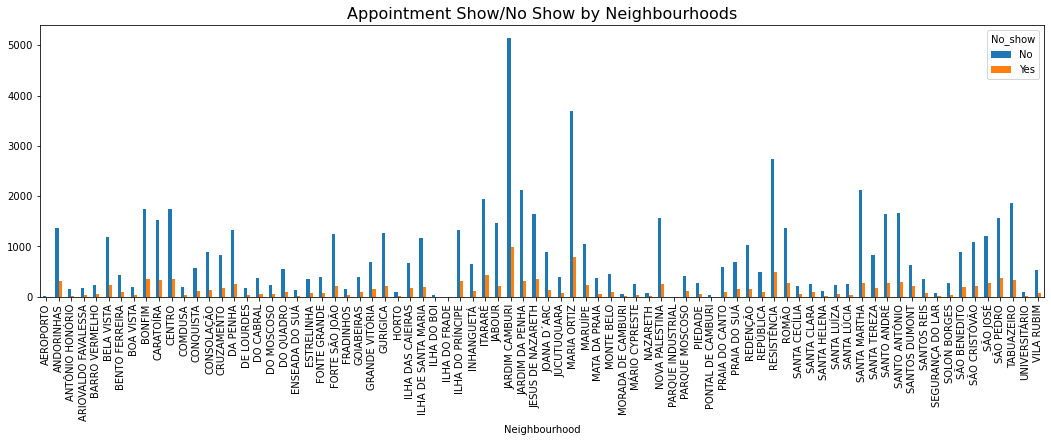

In [49]:
df.groupby('Neighbourhood')['No_show'].value_counts().unstack().plot(kind='bar', figsize=(18,5))
plt.title("Appointment Show/No Show by Neighbourhoods",size = 16)

<a id='conclusions'></a>
## Conclusions

> 1. most people showed up there appointments     
2. Patients recieve sms  have been shown up / not shown up to appointments more than Patients not recieve sms    
3. Patients Females have been shown up / not shown up to appointments more than Patients Males    
4. The most 2 neighborhood where patients are shown up to Appointments is AEROPORTO , PARQUE INDUSTRIAL while the most 3 neighborhood where patients Appointments JARDIM CAMBURI , MARIA ORTIZ , RESISTÊNCIA
5. the most 2 neighborhood where patients are not shown up to Appointments is SANTA CLARA , SANTOS DUMONT while the most 3 neighborhood where patients Appointments JILHA DO FRADE ,ILHA DO BOI , PONTAL DE CAMBURI 
6.  the percentage of amount of persons who do not show up in comparison to total persons showing up in ave is 20% do not show up
## Limitations
>1. there where more shows than noshows in this df which made it hard to compare them both as The data has a high percentage of patients who showed, it didn't seem to be balanced. i think i needed more patients who didn't show on time
2. I think the data set is a first step towards predicting cancellation pattern. Absence of variable such as neighbourhood distance from the hospital limits our ability to correlate distance and cancellation. 